In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [2]:
df=pd.read_csv(r"C:\Users\USER\papaya\Combined_Leaf.csv")

In [3]:
df['16'].unique()

array(['Fresh Papaya Leaf', 'Papaya Black Spot', 'Papaya Leaf Curl',
       'Papaya Ringspot', 'Powdery Mildew'], dtype=object)

In [4]:
df.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16'],
      dtype='object')

In [5]:
df=df.drop("Unnamed: 0",axis=1)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.749893,3.062899,2.222365,3.068743,0.881938,0.789928,0.836790,0.792888,0.569768,0.518929,0.542852,0.520702,0.834022,0.709144,0.789176,0.708593,Fresh Papaya Leaf
1,0.973958,2.050565,1.597426,2.108881,0.973505,0.945987,0.952730,0.943764,0.755846,0.748174,0.751231,0.747684,0.982222,0.962667,0.970842,0.961605,Fresh Papaya Leaf
2,1.148805,2.764168,2.277512,2.787666,0.976294,0.945290,0.951699,0.944618,0.794646,0.785001,0.788239,0.785123,0.972863,0.934894,0.946200,0.934341,Fresh Papaya Leaf
3,0.663358,1.131642,0.800123,1.190235,0.984407,0.973292,0.979534,0.971856,0.652971,0.646309,0.650120,0.645156,0.979113,0.964460,0.974811,0.962620,Fresh Papaya Leaf
4,0.445312,0.772580,0.490074,0.743545,0.985087,0.972965,0.979264,0.972545,0.663605,0.655566,0.659423,0.655110,0.981232,0.967533,0.979352,0.968754,Fresh Papaya Leaf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,4.138312,5.571826,4.151164,5.235002,0.746868,0.690419,0.749389,0.702806,0.440529,0.415262,0.441525,0.420721,0.726737,0.632278,0.726213,0.654507,Powdery Mildew
286,3.596967,4.367935,3.072901,4.525644,0.764670,0.726358,0.797768,0.725058,0.452173,0.434608,0.468508,0.433830,0.755916,0.703407,0.791471,0.692692,Powdery Mildew
287,2.784375,4.574133,3.655591,4.393126,0.829535,0.752815,0.790020,0.760927,0.505706,0.468395,0.486020,0.471917,0.843013,0.742147,0.794229,0.752350,Powdery Mildew
288,4.158333,5.112864,3.533088,5.351050,0.773023,0.734644,0.805629,0.731621,0.461764,0.444144,0.478032,0.442679,0.778622,0.727521,0.811869,0.714820,Powdery Mildew


In [7]:
encoder=LabelEncoder()

In [8]:
df['16']=encoder.fit_transform(df['16'])

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.749893,3.062899,2.222365,3.068743,0.881938,0.789928,0.836790,0.792888,0.569768,0.518929,0.542852,0.520702,0.834022,0.709144,0.789176,0.708593,0
1,0.973958,2.050565,1.597426,2.108881,0.973505,0.945987,0.952730,0.943764,0.755846,0.748174,0.751231,0.747684,0.982222,0.962667,0.970842,0.961605,0
2,1.148805,2.764168,2.277512,2.787666,0.976294,0.945290,0.951699,0.944618,0.794646,0.785001,0.788239,0.785123,0.972863,0.934894,0.946200,0.934341,0
3,0.663358,1.131642,0.800123,1.190235,0.984407,0.973292,0.979534,0.971856,0.652971,0.646309,0.650120,0.645156,0.979113,0.964460,0.974811,0.962620,0
4,0.445312,0.772580,0.490074,0.743545,0.985087,0.972965,0.979264,0.972545,0.663605,0.655566,0.659423,0.655110,0.981232,0.967533,0.979352,0.968754,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,4.138312,5.571826,4.151164,5.235002,0.746868,0.690419,0.749389,0.702806,0.440529,0.415262,0.441525,0.420721,0.726737,0.632278,0.726213,0.654507,4
286,3.596967,4.367935,3.072901,4.525644,0.764670,0.726358,0.797768,0.725058,0.452173,0.434608,0.468508,0.433830,0.755916,0.703407,0.791471,0.692692,4
287,2.784375,4.574133,3.655591,4.393126,0.829535,0.752815,0.790020,0.760927,0.505706,0.468395,0.486020,0.471917,0.843013,0.742147,0.794229,0.752350,4
288,4.158333,5.112864,3.533088,5.351050,0.773023,0.734644,0.805629,0.731621,0.461764,0.444144,0.478032,0.442679,0.778622,0.727521,0.811869,0.714820,4


In [100]:
y=df['16']
x=df.drop('16',axis=1)
x=(x-x.min())/(x.max()-x.min())
#x=(x-x.mean())/x.std()

In [101]:
y.value_counts()

3    73
4    65
0    64
1    54
2    34
Name: 16, dtype: int64

In [102]:
smote=SMOTE(sampling_strategy="minority")
x_sm,y_sm=smote.fit_resample(x,y)

In [103]:
y_sm.value_counts()

3    73
2    73
4    65
0    64
1    54
Name: 16, dtype: int64

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,stratify=y_sm)

In [105]:
knn=KNeighborsClassifier(n_neighbors=5)


In [106]:
np.array(x_sm)

array([[0.14814432, 0.23974446, 0.21660316, ..., 0.42839744, 0.45572288,
        0.44802459],
       [0.06626633, 0.14333377, 0.14601134, ..., 0.96690853, 0.9507277 ,
        0.96062123],
       [0.08471647, 0.21129446, 0.22283246, ..., 0.90791616, 0.8835821 ,
        0.90538405],
       ...,
       [0.32686528, 0.46321614, 0.43671563, ..., 0.80866372, 0.79303401,
        0.81754578],
       [0.51521525, 0.75608796, 0.77966242, ..., 0.46204361, 0.3938518 ,
        0.45001046],
       [0.44244698, 0.69243516, 0.71638325, ..., 0.46512445, 0.39628453,
        0.48023243]])

In [107]:

from mlxtend.plotting import plot_decision_regions



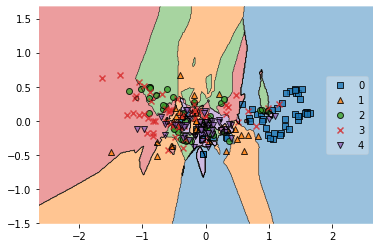

In [108]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
knn.fit(x_train,y_train)
import seaborn as sns
plot_decision_regions(np.array(x_train), np.array(y_train), clf=knn, legend=5)
plt.plot(10,3,color='black')
plt.show()

In [67]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

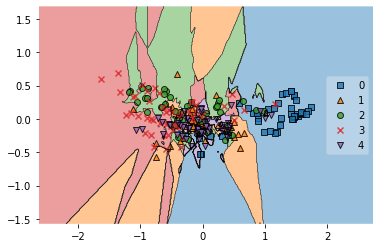

In [71]:
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
plot_decision_regions(np.array(x_train), np.array(y_train), clf=knn, legend=5)
plt.plot(10,3,color='black')
plt.show()

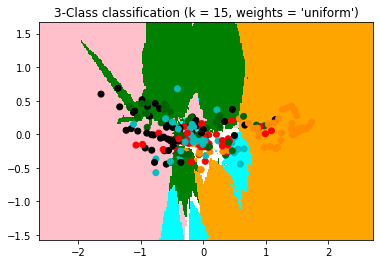

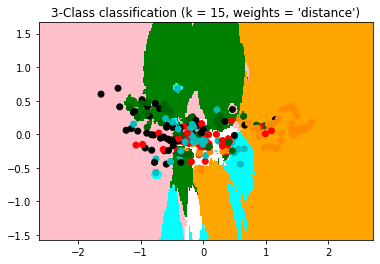

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = x_train  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = y_train

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue','green','pink','white'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue','darkgreen','black','red'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [819]:
y_pred=knn.predict(x_test)

In [820]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.57      0.57      0.57        14
           2       0.50      0.78      0.61        18
           3       0.59      0.53      0.56        19
           4       0.40      0.12      0.19        16

    accuracy                           0.57        83
   macro avg       0.55      0.56      0.53        83
weighted avg       0.55      0.57      0.54        83



In [821]:
dt=DecisionTreeClassifier(criterion="gini")

In [822]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [823]:
pred_d=dt.predict(x_test)

In [824]:
print(classification_report(y_test,pred_d))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.50      0.29      0.36        14
           2       0.68      0.72      0.70        18
           3       0.46      0.58      0.51        19
           4       0.44      0.50      0.47        16

    accuracy                           0.58        83
   macro avg       0.59      0.57      0.57        83
weighted avg       0.59      0.58      0.58        83

